<a href="https://colab.research.google.com/github/nedokormysh/GB_Libraries_python_for_DS/blob/lesson7-8/Libraries_python_DS_HW_7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

In [ ]:
X = pd.DataFrame(data, columns=boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y = pd.DataFrame(boston.target, columns=['Price'])
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

Масштабируйте данные с помощью StandardScaler.

In [ ]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42. Постройте диаграмму рассеяния на этих данных.

In [ ]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


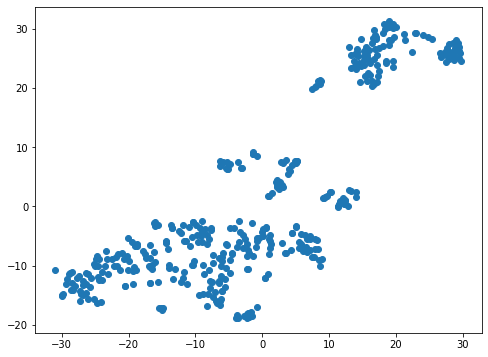

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

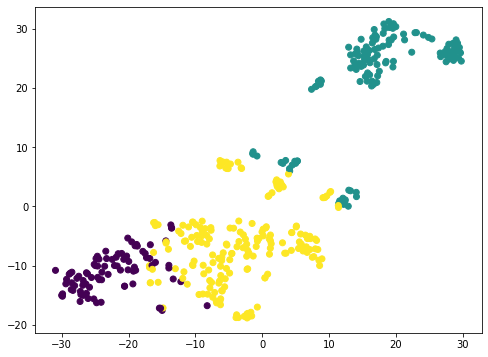

In [ ]:
plt.figure(figsize = (8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
# plt.legend()

In [ ]:
def mean_price_CRIM(y, X, labels):
  for el in set(labels):
    mean_price = y[labels == el].mean()
    mean_CRIM = X['CRIM'][labels == el].mean()
    print(f'Mean price {np.round(mean_price[0], 3)} and mean CRIM {np.round(mean_CRIM, 3)} of cluster {el}')

In [ ]:
mean_price_CRIM(y_train, X_train, labels_train)

Mean price 27.788 and mean CRIM 0.074 of cluster 0
Mean price 16.165 and mean CRIM 10.797 of cluster 1
Mean price 24.958 and mean CRIM 0.422 of cluster 2


**Задание 3** *

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [ ]:
labels_test = kmeans.predict(X_test_scaled)
pd.value_counts(labels_test)

2    51
1    35
0    16
dtype: int64

In [ ]:
mean_price_CRIM(y_test, X_test, labels_test)

Mean price 31.35 and mean CRIM 0.062 of cluster 0
Mean price 16.437 and mean CRIM 10.166 of cluster 1
Mean price 21.861 and mean CRIM 0.266 of cluster 2
